In [1]:
import pandas as pd
import statistics as sts
import seaborn as srn
low_memory = False
import matplotlib as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'data\perfil_eleitorado_2020.csv'


In [3]:
dataset = pd.read_csv(filename, sep = ';', encoding = "ISO-8859-1")

In [4]:
dataset.shape

(1048575, 21)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   DT_GERACAO                  1048575 non-null  object
 1   HH_GERACAO                  1048575 non-null  object
 2   ANO_ELEICAO                 1048575 non-null  int64 
 3   SG_UF                       1048575 non-null  object
 4   CD_MUNICIPIO                1048575 non-null  int64 
 5   NM_MUNICIPIO                1048575 non-null  object
 6   CD_MUN_SIT_BIOMETRIA        1048575 non-null  int64 
 7   DS_MUN_SIT_BIOMETRIA        1048575 non-null  object
 8   NR_ZONA                     1048575 non-null  int64 
 9   CD_GENERO                   1048575 non-null  int64 
 10  DS_GENERO                   1048575 non-null  object
 11  CD_ESTADO_CIVIL             1048575 non-null  int64 
 12  DS_ESTADO_CIVIL             1048575 non-null  object
 13  CD_FAIXA_ETA

In [7]:
dataset.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
532822,10/09/2020,23:04:11,2020,MS,90514,CAMPO GRANDE,0,Sem biometria,54,2,MASCULINO,1,SOLTEIRO,2124,21 a 24 anos,6,ENSINO MÉDIO COMPLETO,870,862,7,0
704415,10/09/2020,23:04:11,2020,RS,88617,SANTO CRISTO,0,Sem biometria,102,4,FEMININO,3,CASADO,4044,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,11,11,0,0
362993,10/09/2020,23:04:11,2020,MG,44610,DORES DE GUANHÃES,0,Sem biometria,121,4,FEMININO,1,SOLTEIRO,7074,70 a 74 anos,1,ANALFABETO,8,1,0,0
464973,10/09/2020,23:04:11,2020,MG,46590,ITAMONTE,0,Sem biometria,306,4,FEMININO,9,DIVORCIADO,8084,80 a 84 anos,8,SUPERIOR COMPLETO,1,1,0,0
287887,10/09/2020,23:04:11,2020,MG,46051,IGUATAMA,0,Sem biometria,18,4,FEMININO,9,DIVORCIADO,4549,45 a 49 anos,8,SUPERIOR COMPLETO,3,3,0,0
765034,10/09/2020,23:04:11,2020,SP,71072,SÃO PAULO,0,Sem biometria,5,2,MASCULINO,7,SEPARADO JUDICIALMENTE,5054,50 a 54 anos,6,ENSINO MÉDIO COMPLETO,6,3,0,0
701040,10/09/2020,23:04:11,2020,MS,98051,DOURADINA,0,Sem biometria,18,4,FEMININO,9,DIVORCIADO,3539,35 a 39 anos,7,SUPERIOR INCOMPLETO,1,1,0,0
1022635,10/09/2020,23:04:11,2020,MG,48593,MONTE BELO,0,Sem biometria,195,2,MASCULINO,3,CASADO,6064,60 a 64 anos,4,ENSINO FUNDAMENTAL COMPLETO,19,11,0,0
622563,10/09/2020,23:04:11,2020,CE,15997,PARAIPABA,0,Sem biometria,109,2,MASCULINO,3,CASADO,4549,45 a 49 anos,1,ANALFABETO,7,7,0,0
671629,10/09/2020,23:04:11,2020,PI,10731,ESPERANTINA,0,Sem biometria,41,2,MASCULINO,1,SOLTEIRO,4549,45 a 49 anos,5,ENSINO MÉDIO INCOMPLETO,15,14,0,0


In [49]:
# #01 Jornalista quer saber a classificação do eleitorado a partir do estado civil, escolaridade e faixa etária,
# além da quantidade de eleitores que utilizam nome social 	


In [8]:
x = dataset.groupby(['DS_ESTADO_CIVIL', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE']).size()

In [9]:
x

DS_ESTADO_CIVIL  DS_FAIXA_ETARIA                 DS_GRAU_ESCOLARIDADE         
CASADO           100 anos ou mais                ANALFABETO                       757
                                                 ENSINO FUNDAMENTAL COMPLETO      259
                                                 ENSINO FUNDAMENTAL INCOMPLETO    573
                                                 ENSINO MÉDIO COMPLETO            170
                                                 ENSINO MÉDIO INCOMPLETO           77
                                                                                 ... 
VIÚVO            Inválido                        ENSINO FUNDAMENTAL COMPLETO        2
                                                 ENSINO FUNDAMENTAL INCOMPLETO      9
                                                 ENSINO MÉDIO COMPLETO              1
                                                 ENSINO MÉDIO INCOMPLETO            1
                                                 LÊ E ESCREVE

In [10]:
estado_civil = dataset.groupby(['DS_ESTADO_CIVIL']).size()

In [11]:
estado_civil

DS_ESTADO_CIVIL
CASADO                    306177
DIVORCIADO                157154
NÃO INFORMADO               7842
SEPARADO JUDICIALMENTE     95249
SOLTEIRO                  341632
VIÚVO                     140521
dtype: int64

<AxesSubplot:xlabel='DS_ESTADO_CIVIL'>

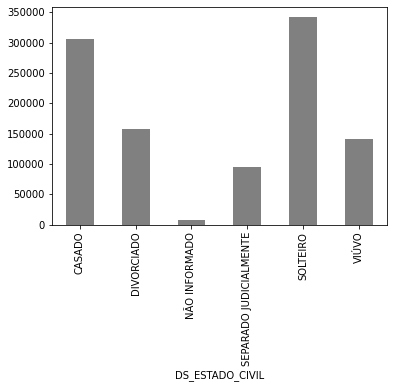

In [12]:
estado_civil.plot.bar(color = 'gray')

In [13]:
faixa_etaria = dataset.groupby(['DS_FAIXA_ETARIA']).size()

In [14]:
faixa_etaria

DS_FAIXA_ETARIA
100 anos ou mais                   7212
16 anos                            7743
17 anos                           11739
18 anos                           15568
19 anos                           18350
20 anos                           20473
21 a 24 anos                      36729
25 a 29 anos                      49599
30 a 34 anos                      59601
35 a 39 anos                      69124
40 a 44 anos                      75699
45 a 49 anos                      80011
50 a 54 anos                      85161
55 a 59 anos                      87869
60 a 64 anos                      85787
65 a 69 anos                      80014
70 a 74 anos                      70679
75 a 79 anos                      58950
80 a 84 anos                      48632
85 a 89 anos                      36350
90 a 94 anos                      26042
95 a 99 anos                      16706
Inválido                            537
dtype: int64

<AxesSubplot:xlabel='DS_FAIXA_ETARIA'>

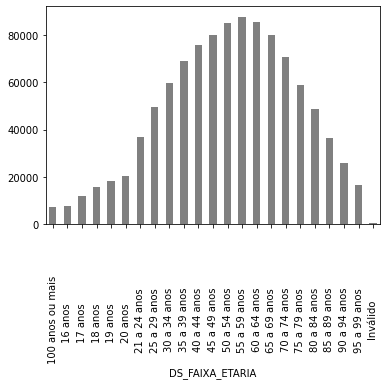

In [15]:
faixa_etaria.plot.bar(color = 'gray')

In [16]:
grau_escolaridade = dataset.groupby(['DS_GRAU_ESCOLARIDADE']).size()

In [17]:
grau_escolaridade

DS_GRAU_ESCOLARIDADE
ANALFABETO                       128210
ENSINO FUNDAMENTAL COMPLETO      127884
ENSINO FUNDAMENTAL INCOMPLETO    178753
ENSINO MÉDIO COMPLETO            148961
ENSINO MÉDIO INCOMPLETO          118941
LÊ E ESCREVE                     147168
NÃO INFORMADO                      3833
SUPERIOR COMPLETO                111447
SUPERIOR INCOMPLETO               83378
dtype: int64

<AxesSubplot:xlabel='DS_GRAU_ESCOLARIDADE'>

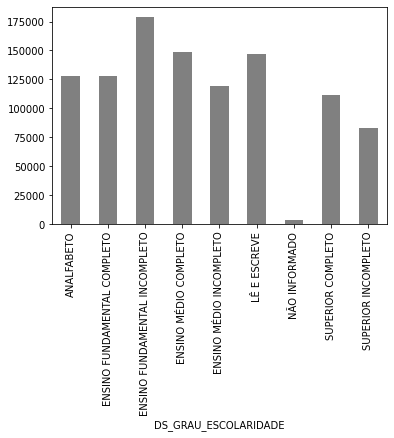

In [18]:
grau_escolaridade.plot.bar(color = 'gray')

In [19]:
nm_social = dataset.groupby(['QT_ELEITORES_INC_NM_SOCIAL']).size()

In [20]:
nm_social

QT_ELEITORES_INC_NM_SOCIAL
0    1046132
1       2241
2        162
3         29
4          5
5          2
6          4
dtype: int64

<AxesSubplot:xlabel='QT_ELEITORES_INC_NM_SOCIAL'>

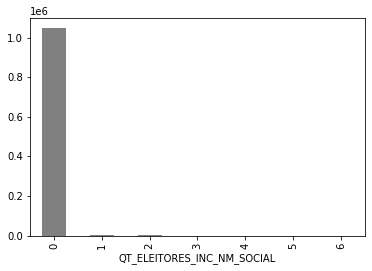

In [21]:
nm_social.plot.bar(color = 'gray')

In [22]:
#08 Jornalista quer saber a percentagem de eleitores ausentes da última eleição 

In [25]:
csv_abstencao = r'data\perfil_comparecimento_abstencao_2020.csv'

In [27]:
dataset_abs = pd.read_csv(csv_abstencao, sep = ';', encoding = "ISO-8859-1")

In [28]:
dataset_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770970 entries, 0 to 4770969
Data columns (total 23 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   DT_GERACAO                     object
 1   HH_GERACAO                     object
 2   ANO_ELEICAO                    int64 
 3   NR_TURNO                       int64 
 4   SG_UF                          object
 5   CD_MUNICIPIO                   int64 
 6   NM_MUNICIPIO                   object
 7   NR_ZONA                        int64 
 8   CD_GENERO                      int64 
 9   DS_GENERO                      object
 10  CD_ESTADO_CIVIL                int64 
 11  DS_ESTADO_CIVIL                object
 12  CD_FAIXA_ETARIA                int64 
 13  DS_FAIXA_ETARIA                object
 14  CD_GRAU_ESCOLARIDADE           int64 
 15  DS_GRAU_ESCOLARIDADE           object
 16  QT_APTOS                       int64 
 17  QT_COMPARECIMENTO              int64 
 18  QT_ABSTENCAO          

In [29]:
dataset_abs.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
4636213,21/12/2020,14:48:46,2020,1,SP,67458,NARANDIBA,261,2,MASCULINO,3,CASADO,5559,55 a 59 anos,7,SUPERIOR INCOMPLETO,1,1,0,0,0,0,0
2669925,21/12/2020,14:48:46,2020,1,SP,61220,ALUMÍNIO,131,2,MASCULINO,9,DIVORCIADO,6064,60 a 64 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,20,15,5,0,0,3,2
1128130,21/12/2020,14:48:46,2020,1,ES,56111,ARACRUZ,20,0,NÃO INFORMADO,0,NÃO INFORMADO,9599,95 a 99 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,0,1,0,0,0,0
4038784,21/12/2020,14:48:46,2020,1,RN,17612,NATAL,1,2,MASCULINO,1,SOLTEIRO,-3,Inválido,5,ENSINO MÉDIO INCOMPLETO,108,81,27,0,0,8,2
4527535,21/12/2020,14:48:46,2020,2,CE,13730,CAUCAIA,123,2,MASCULINO,1,SOLTEIRO,2124,21 a 24 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,454,305,149,3,1,55,29
3263186,21/12/2020,14:48:46,2020,1,RO,35,PORTO VELHO,20,4,FEMININO,3,CASADO,5054,50 a 54 anos,5,ENSINO MÉDIO INCOMPLETO,106,88,18,0,0,15,5
1016693,21/12/2020,14:48:46,2020,1,PB,22276,SUMÉ,43,2,MASCULINO,7,SEPARADO JUDICIALMENTE,5559,55 a 59 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,7,7,0,0,0,0,0
4304766,21/12/2020,14:48:46,2020,1,RJ,60011,RIO DE JANEIRO,14,4,FEMININO,3,CASADO,3539,35 a 39 anos,7,SUPERIOR INCOMPLETO,94,73,21,0,0,0,0
3745758,21/12/2020,14:48:46,2020,1,TO,92002,BERNARDO SAYÃO,4,4,FEMININO,3,CASADO,2124,21 a 24 anos,6,ENSINO MÉDIO COMPLETO,14,12,2,0,0,3,2
4209150,21/12/2020,14:48:46,2020,1,GO,94072,ITAGUARU,57,2,MASCULINO,3,CASADO,4044,40 a 44 anos,4,ENSINO FUNDAMENTAL COMPLETO,9,8,1,0,0,1,0


In [66]:
# AUZENTES
dataset_abs['QT_ABSTENCAO_TTE'].sum()

3394711

In [68]:
#09 Jornalista quer saber a evolução do número de eleitores (12/2010 - 12/2020)

In [139]:
csv_evolucao = r'data\evolucao_do_eleitorado.csv'

In [140]:
dataset_evl = pd.read_csv(csv_evolucao, sep = ';', encoding = "ISO-8859-1")

In [141]:
dataset_evl.sample(7)

,Abrangencia,Inicio,Fim,%
2,NORDESTE,36660029,39238502,"7,033"
4,SUDESTE,58822090,62505545,"6,262"
1,EXTERIOR,199795,509956,"155,24"
0,CENTRO-OESTE,9672931,10713941,"10,762"
6,TOTAL,135539919,145958233,"7,687"
5,SUL,20201686,21502285,"6,438"
3,NORTE,9983388,11488004,"15,071"


In [142]:
evolucao = dataset_evl.groupby(['Abrangencia']).sum()[['Inicio']]

In [147]:
evolucao

,Inicio
Abrangencia,
CENTRO-OESTE,9672931
EXTERIOR,199795
NORDESTE,36660029
NORTE,9983388
SUDESTE,58822090
SUL,20201686
TOTAL,135539919


<AxesSubplot:xlabel='Abrangencia', ylabel='Inicio'>

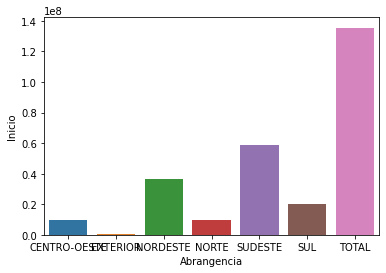

In [148]:
srn.barplot(x=evolucao.index, y=evolucao.Inicio)